In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###### Plan:
- Remove the NaN and playername column 
- Plot a bar chart to identify if their is any relational order for tbe categorical variable based on my subject matter knowledge
- Stepwise Regression: Use the P-value and Adjusted R squared to select features, that is, build the model
- Identify the most important predictor variable from the selected ones from above using the standardized method
- Check for Regression Assumptions
* Linearity(Correct Functional form): Trial and error since specifying a regression model is an iterative process
* No Multicollinearity; use VIF
* Independent Error Terms has been automatically checked since it's not a time series data
* Normality of Erros
* Homoscedasticity ; Constant error variance
* One bar plot each to visualize relationship between the dependent variable and independent variable
* Assume that the linear regression assumptions are met
* So all in, then backward elimination
* Based on the remaining parameters, we would now run the assumptions in order to improve the model

In [2]:
footballData = pd.read_csv('footballData.csv')
footballData.head(3)

,Player name,Position,Age,Market Value,NaN,Matches,Goals,Own Goals,Assists,Yellow cards,Second Yellow card,Red Cards,Substitued on,Substituted off
0,Kylian Mbappé,Right Winger,20,200,0,30,24,0,13,4,0,1,5,5
1,Lionel Messi,Right Winger,31,160,0,26,27,0,17,1,0,0,3,1
2,Harry Kane,Centre-Forward,25,150,0,36,21,0,9,5,0,0,4,5


In [3]:
footballData = footballData.drop(['Player name', 'NaN'], axis = 1)
footballData['Market Value'] = footballData['Market Value'] * 1000000

In [4]:
footballData.tail(3)

,Position,Age,Market Value,Matches,Goals,Own Goals,Assists,Yellow cards,Second Yellow card,Red Cards,Substitued on,Substituted off
497,Left Winger,24,16000000,31,4,0,4,5,0,0,11,12
498,Goalkeeper,21,16000000,6,0,0,0,0,0,0,0,0
499,Right-Back,22,16000000,26,2,0,2,1,0,0,7,2


The dataset has 12 columns; 11 independent variables and 1 dependent variable which is the market value. This is a regression problem because the value being predicted is a continuous numeric value. From the 11 independent variables, only one categorical variable is present while the remaining 10 are numerical variables. Categorical variables need to be encoded since Machine learning models are based on mathematical equations. Due to knowledge about the subject matter, a bar chat showing the relationship between the categoical variable and the numerical variable will be plotted to establish if their is a relational order in the categorical variable.

In [5]:
#Creating a list of list containing the Positions and the corresponding Market Value
position = footballData['Position']
marketValue = footballData['Market Value']
posMar = pd.concat((position, marketValue), axis = 1, ignore_index = True)
posMar = posMar.to_dict('split')
listPosMar = posMar['data']
listPosMar[:3]

[['Right Winger', 200000000],
 ['Right Winger', 160000000],
 ['Centre-Forward', 150000000]]

In [6]:
#Creating a dictionary to store the total market value for each unique position
dicPosMar = {}
for i in range(len(listPosMar)):
    if listPosMar[i][0] in dicPosMar.keys():
        dicPosMar[listPosMar[i][0]] += listPosMar[i][1]
    else:
        dicPosMar[listPosMar[i][0]] = listPosMar[i][1]
dicPosMar

{'Right Winger': 2165000000,
 'Centre-Forward': 2509000000,
 'Attacking Midfield': 1558000000,
 'Second Striker': 349000000,
 'Central Midfield': 2868000000,
 'Left Winger': 2057000000,
 'Centre-Back': 2656000000,
 'Goalkeeper': 878000000,
 'Defensive Midfield': 1214000000,
 'Left-Back': 853000000,
 'Right-Back': 855000000,
 'Right Midfield': 75000000,
 'Left Midfield': 71000000}

In [7]:
#Creating a dictionary to store the total number of people in the dataset per position
numPerPos = {}
for i in range(len(listPosMar)):
    numPerPos.setdefault(listPosMar[i][0], 0)
    numPerPos[listPosMar[i][0]] += 1
numPerPos

{'Right Winger': 52,
 'Centre-Forward': 64,
 'Attacking Midfield': 39,
 'Second Striker': 8,
 'Central Midfield': 86,
 'Left Winger': 50,
 'Centre-Back': 79,
 'Goalkeeper': 24,
 'Defensive Midfield': 38,
 'Left-Back': 28,
 'Right-Back': 27,
 'Right Midfield': 2,
 'Left Midfield': 3}

In [8]:
#Creating a dictionary to store the average market value per position
aveValPerPos = {}
posList = list(numPerPos.keys())
for i in range(len(posList)):
    aveValPerPos.setdefault(posList[i], (round((dicPosMar[posList[i]]/numPerPos[posList[i]]), 2)))
aveValPerPos

{'Right Winger': 41634615.38,
 'Centre-Forward': 39203125.0,
 'Attacking Midfield': 39948717.95,
 'Second Striker': 43625000.0,
 'Central Midfield': 33348837.21,
 'Left Winger': 41140000.0,
 'Centre-Back': 33620253.16,
 'Goalkeeper': 36583333.33,
 'Defensive Midfield': 31947368.42,
 'Left-Back': 30464285.71,
 'Right-Back': 31666666.67,
 'Right Midfield': 37500000.0,
 'Left Midfield': 23666666.67}

In [9]:
aveValPerPosList = []
for i in range(len(list(aveValPerPos.keys()))):
    tempList = []
    tempList.append(list(aveValPerPos.keys())[i])
    tempList.append(list(aveValPerPos.values())[i])
    aveValPerPosList.append(tempList)
x = []
y = []
for i in range(len(aveValPerPosList)):
    x.append(aveValPerPosList[i][0])
    y.append(aveValPerPosList[i][1])

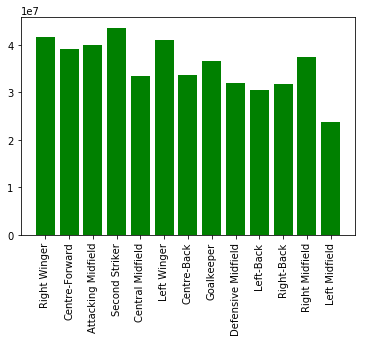

In [10]:
#Plotting a bar chart to show the relationship between the categorical variable and the numerical variable
plt.bar(x,y, color = 'green')
plt.xticks(rotation = 90)
plt.show()

In [11]:
#Converting the positions into 3 - Striker, Midfielder, Defender
footballData['newPosition'] = footballData.Position.map({'Right Winger':'Striker', 'Centre-Forward':'Striker',\
                                                         'Attacking Midfield':'Midfielder', 'Second Striker':'Striker',\
                                                         'Central Midfield':'Midfielder', 'Left Winger':'Striker',\
                                                         'Centre-Back':'Defender', 'Goalkeeper':'Defender',  \
                                                         'Defensive Midfield':'Midfielder', 'Left-Back':'Defender',\
                                                         'Right-Back':'Defender', 'Right Midfield':'Midfielder',\
                                                         'Left Midfield':'Midfielder'})
footballData.isnull().sum()
footballData.tail(3)

,Position,Age,Market Value,Matches,Goals,Own Goals,Assists,Yellow cards,Second Yellow card,Red Cards,Substitued on,Substituted off,newPosition
497,Left Winger,24,16000000,31,4,0,4,5,0,0,11,12,Striker
498,Goalkeeper,21,16000000,6,0,0,0,0,0,0,0,0,Defender
499,Right-Back,22,16000000,26,2,0,2,1,0,0,7,2,Defender


In [12]:
newPosition = footballData['newPosition']
marketValue = footballData['Market Value']
newPosMar = pd.concat((newPosition, marketValue), axis=1, ignore_index= True)
newPosMar = newPosMar.to_dict('split')
newListPosMar = newPosMar['data']
newListPosMar[:3]

[['Striker', 200000000], ['Striker', 160000000], ['Striker', 150000000]]

In [13]:
#Total market value for each position
newDicPosMar = {}
for i in range(len(newListPosMar)):
    if newListPosMar[i][0] in newDicPosMar.keys():
        newDicPosMar[newListPosMar[i][0]] += newListPosMar[i][1]
    else:
        newDicPosMar[newListPosMar[i][0]] = newListPosMar[i][1]
newDicPosMar

{'Striker': 7080000000, 'Midfielder': 5786000000, 'Defender': 5242000000}

In [14]:
#Total number of people in the sample per position
newNumPerPos = {}
for i in range(len(newListPosMar)):
    newNumPerPos.setdefault(newListPosMar[i][0], 0)
    newNumPerPos[newListPosMar[i][0]] += 1
newNumPerPos

{'Striker': 174, 'Midfielder': 168, 'Defender': 158}

In [15]:
#Average market value per position
newAveValPerPos = {}
newPosList = list(newDicPosMar.keys())
for i in range(len(list(newPosList))):
    newAveValPerPos.setdefault(newPosList[i], (round((newDicPosMar[newPosList[i]]/newNumPerPos[newPosList[i]]), 2)))
newAveValPerPos

{'Striker': 40689655.17, 'Midfielder': 34440476.19, 'Defender': 33177215.19}

In [16]:
newAveValPerPosList = []
for i in range(len(list(newAveValPerPos.keys()))):
    newTempList = []
    newTempList.append(list(newAveValPerPos.keys())[i])
    newTempList.append(list(newAveValPerPos.values())[i])
    newAveValPerPosList.append(newTempList)
newX = []
newY = []
for i in range(len(newAveValPerPosList)):
    newX.append(newAveValPerPosList[i][0])
    newY.append(newAveValPerPosList[i][1])
newX, newY

(['Striker', 'Midfielder', 'Defender'],
 [40689655.17, 34440476.19, 33177215.19])

<BarContainer object of 3 artists>

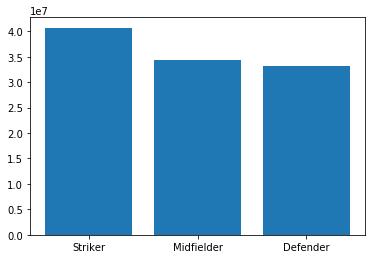

In [17]:
plt.bar(newX,newY)

In [18]:
footballData['newPosEncoded'] = footballData.newPosition.map({'Striker':2, 'Midfielder':1, 'Defender':0})
footballData.head()

,Position,Age,Market Value,Matches,Goals,Own Goals,Assists,Yellow cards,Second Yellow card,Red Cards,Substitued on,Substituted off,newPosition,newPosEncoded
0,Right Winger,20,200000000,30,24,0,13,4,0,1,5,5,Striker,2
1,Right Winger,31,160000000,26,27,0,17,1,0,0,3,1,Striker,2
2,Centre-Forward,25,150000000,36,21,0,9,5,0,0,4,5,Striker,2
3,Attacking Midfield,27,150000000,16,4,0,4,2,0,0,6,9,Midfielder,1
4,Attacking Midfield,26,140000000,34,9,0,5,1,0,0,9,14,Midfielder,1


In [19]:
X = footballData.iloc[:,[1,3,4,5,6,7,8,9,10,11,13]].values
y = footballData.iloc[:, 2].values
X.shape,y.shape
X[0, :]

array([20, 30, 24,  0, 13,  4,  0,  1,  5,  5,  2], dtype=int64)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape,y_train.shape

((400, 11), (400,))

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [22]:
regressor.score(X_train,y_train)

0.2876484961775747

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)  

457594261805522.56

In [24]:
import statsmodels.formula.api as sm
sigLevel = 0.05
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10]]
X_opt = np.append(arr = np.ones((500,1)).astype(int), values = X, axis = 1)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
pVals = regressor_OLS.pvalues #returns a vector

#print(np.argmax(pVals)) returns the indices of the maximum value along an axis
while pVals[np.argmax(pVals)] > sigLevel:
    X_opt = np.delete(X_opt, np.argmax(pVals), axis = 1)
    print('pVal deleted at index', str(np.argmax(pVals)), '\n', str(X_opt.shape[1]), 'variables remaining')
    regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
    pVals = regressor_OLS.pvalues
    
regressor_OLS.summary()

pVal deleted at index 7 
 11 variables remaining
pVal deleted at index 4 
 10 variables remaining
pVal deleted at index 1 
 9 variables remaining
pVal deleted at index 7 
 8 variables remaining
pVal deleted at index 6 
 7 variables remaining
pVal deleted at index 4 
 6 variables remaining
pVal deleted at index 4 
 5 variables remaining


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     43.06
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           5.25e-31
Time:                        07:05:00   Log-Likelihood:                -9152.0
No. Observations:                 500   AIC:                         1.831e+04
Df Residuals:                     495   BIC:                         1.834e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.07e+07   3.61e+06      5.734      0.000    1.36e+07    2.78e+07
x1          3.656e+05   1.42e+05      2.579      0.010    8.71e+04    6.44e+05
x2          2.078e+06    2.8e+05      7.425      0.000    1.53e+06    2.63e+06
x3          1.115e+06   3.85e+05      2.897      0.004    3.59e+05    1.87e+06
x4         -5.662e+06   1.51e+06     -3.740      0.000   -8.64e+06   -2.69e+06
==============================================================================
Omnibus:                      185.151   Durbin-Watson:                   0.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              775.436
Skew:                           1.631   Prob(JB):                    4.13e-169
Kurtosis:                       8.156   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
copyFootballData = footballData.copy(deep = True)

In [40]:
copyFootballDataX = copyFootballData.drop(['Position', 'Market Value', 'newPosition'], axis = 1)
copyFootballDatay = copyFootballData['Market Value']

In [41]:
intercept = pd.Series(np.ones((500,)).astype(int))
copyFootballDataX = pd.concat((intercept.rename('intercept'),copyFootballDataX), axis = 1)
copyFootballDataX.head()

,intercept,Age,Matches,Goals,Own Goals,Assists,Yellow cards,Second Yellow card,Red Cards,Substitued on,Substituted off,newPosEncoded
0,1,20,30,24,0,13,4,0,1,5,5,2
1,1,31,26,27,0,17,1,0,0,3,1,2
2,1,25,36,21,0,9,5,0,0,4,5,2
3,1,27,16,4,0,4,2,0,0,6,9,1
4,1,26,34,9,0,5,1,0,0,9,14,1


In [42]:
import statsmodels.formula.api as sm
sigLevel = 0.05
mod = sm.OLS(copyFootballDatay, copyFootballDataX).fit()
pVals = mod.pvalues

#print(np.argmax(pVals)) returns the indices of the maximum value along an axis
while pVals[np.argmax(pVals)] > sigLevel:
    copyFootballDataX = copyFootballDataX.drop([np.argmax(pVals)], axis = 1)
    #print('pVal deleted at index', str(np.argmax(pVals)), '\n', str(X_opt.shape[1]), 'variables remaining')
    print('Null Hypothesis is that we would obtain the statistic we have even without', np.argmax(pVals))
    print('Given the null hypothesis to be true, the probability of obtaining the statistics is', str(pVals[np.argmax(pVals)]))
    mod = sm.OLS(copyFootballDatay, copyFootballDataX).fit()
    pVals = mod.pvalues
       
mod.summary()

Null Hypothesis is that we would obtain the statistic we have even without Second Yellow card
Given the null hypothesis to be true, the probability of obtaining the statistics is 0.8841655407886292
Null Hypothesis is that we would obtain the statistic we have even without Own Goals
Given the null hypothesis to be true, the probability of obtaining the statistics is 0.8691865195578982
Null Hypothesis is that we would obtain the statistic we have even without Age
Given the null hypothesis to be true, the probability of obtaining the statistics is 0.6464685180707439
Null Hypothesis is that we would obtain the statistic we have even without Substituted off
Given the null hypothesis to be true, the probability of obtaining the statistics is 0.3718240389598586
Null Hypothesis is that we would obtain the statistic we have even without Substitued on
Given the null hypothesis to be true, the probability of obtaining the statistics is 0.27177506852905103
Null Hypothesis is that we would obtain t

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Market Value   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     43.06
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           5.25e-31
Time:                        07:15:00   Log-Likelihood:                -9152.0
No. Observations:                 500   AIC:                         1.831e+04
Df Residuals:                     495   BIC:                         1.834e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept       2.07e+07   3.61e+06      5.734      0.000    1.36e+07    2.78e+07
Matches        3.656e+05   1.42e+05      2.579      0.010    8.71e+04    6.44e+05
Goals          2.078e+06    2.8e+05      7.425      0.000    1.53e+06    2.63e+06
Assists        1.115e+06   3.85e+05      2.897      0.004    3.59e+05    1.87e+06
newPosEncoded -5.662e+06   1.51e+06     -3.740      0.000   -8.64e+06   -2.69e+06
==============================================================================
Omnibus:                      185.151   Durbin-Watson:                   0.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              775.436
Skew:                           1.631   Prob(JB):                    4.13e-169
Kurtosis:                       8.156   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
footballData.head()
X = copyFootballDataX.iloc[:,:].values
y = copyFootballDatay.iloc[:,].values
X.shape,y.shape

((500, 5), (500,))

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)
X_train.shape,y_train.shape

((400, 5), (400,))

In [92]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
regressor.score(X_train,y_train)

0.2695661813725613

In [93]:
y_pred = regressor.predict(X_test)

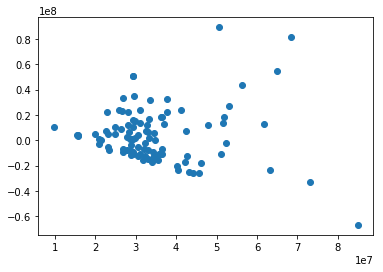

In [95]:
#Normality of errors
residual = y_test - y_pred
residual = pd.Series(residual)
plt.scatter(y_pred, residual)

2.088717026781209

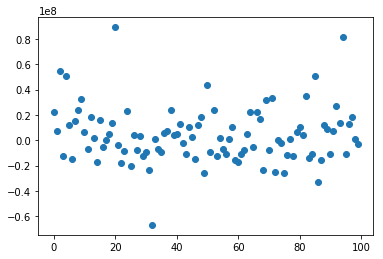

In [96]:
#Independence of errors
plt.scatter(residual.index, residual.values)
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residual)

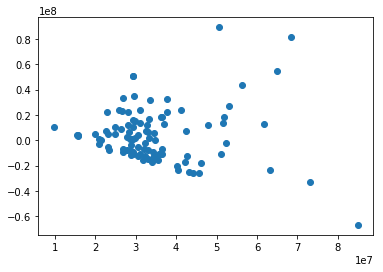

In [97]:
#Homoscedasticity
plt.scatter(y_pred, residual)

In [99]:
#Detecting multicollinearity using VIF
#VIF = 1 / (1-R_squared)

In [ ]:
#Linearity - correct functional form